In [1]:
# import liberray
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv(r"sms_spam_dataset.csv", encoding="ISO-8859-1")


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# DATA CLEANING

In [5]:
# check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# descritbe the dataset 
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
# drop three columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [8]:
# reaname the column name
df.rename(columns={"v1":"TARGET","v2":"TEXT"},inplace=True)

In [9]:
# check the null value inn the dataset
df.isnull().sum()

TARGET    0
TEXT      0
dtype: int64

In [10]:
# check the duplicate value
df.duplicated().sum()

403

In [11]:
# remoove duplicate
df.drop_duplicates(keep="first")

,TARGET,TEXT
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# LABEL ENCODING

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["TARGET"]=le.fit_transform(df["TARGET"])
df.head()

,TARGET,TEXT
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [13]:
df["TARGET"].value_counts()

TARGET
0    4825
1     747
Name: count, dtype: int64

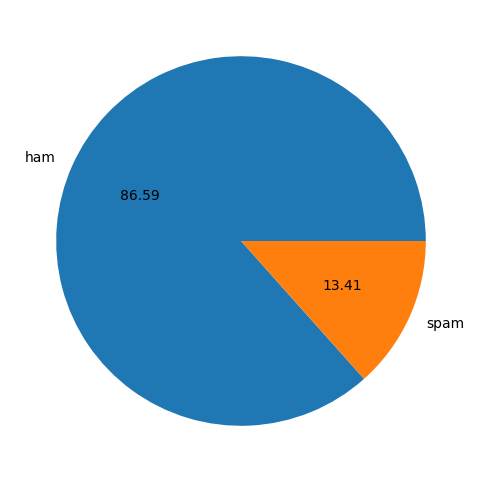

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(df["TARGET"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [15]:
# check the all numbere of word
df["num_charecter"]=df["TEXT"].apply(len)

In [16]:
df

,TARGET,TEXT,num_charecter
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


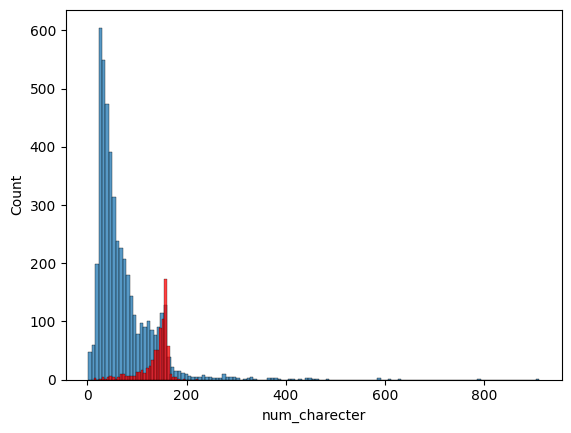

In [17]:
# plot histogram of spam and ham at num_char
import seaborn as sns
sns.histplot(df[df["TARGET"]==0]["num_charecter"])
sns.histplot(df[df["TARGET"]==1]["num_charecter"],color="r")
plt.show()

# data preprocessing

In [18]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [20]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#  NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))  # Load stopwords once
lemmatizer = WordNetLemmatizer()  # Initialize Lemmatizer

y = []  # List to store processed text

for text in df["TEXT"]:
    words = word_tokenize(text)  # Tokenize the sentence into words
    filtered_words = [
        lemmatizer.lemmatize(word.lower())  
        for word in words 
        if word.lower() not in stop_words  # Remove stopwords
        and word.isalpha()  
    ]
    cleaned_text = " ".join(filtered_words)  
    y.append(cleaned_text)

df["Text_Cleaned"] = y  # Save cleaned text in a new column

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TARGET         5572 non-null   int32 
 1   TEXT           5572 non-null   object
 2   num_charecter  5572 non-null   int64 
 3   Text_Cleaned   5572 non-null   object
dtypes: int32(1), int64(1), object(2)
memory usage: 152.5+ KB


In [22]:
df

,TARGET,TEXT,num_charecter,Text_Cleaned
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think go usf life around though
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,time tried contact u pound prize claim easy ca...
5568,0,Will Ì_ b going to esplanade fr home?,37,b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,pity mood suggestion
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitching acted like interested buying some...


In [23]:
df["Text_Cleaned"]

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Text_Cleaned, Length: 5572, dtype: object

In [24]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,background_color="white", min_font_size=10)
#  importent word in spam masseges
wc_spam=wc.generate(df[df["TARGET"]==1]["Text_Cleaned"].str.cat(sep=" "))

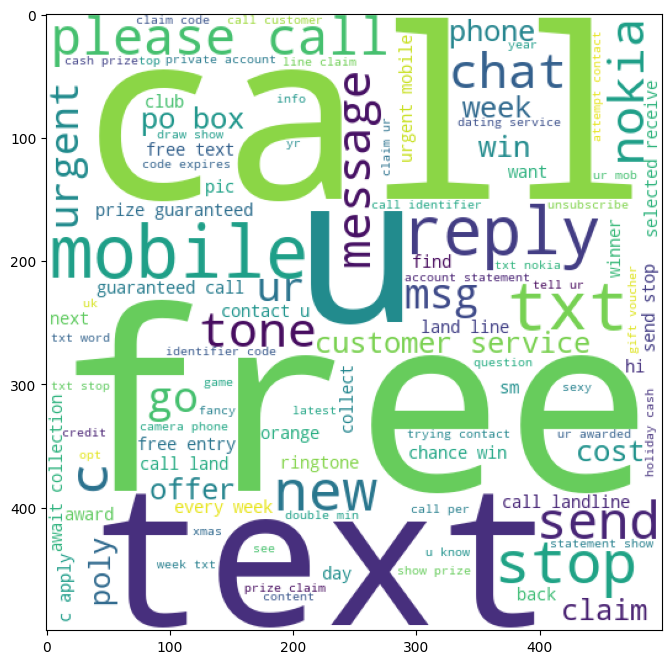

In [25]:
plt.figure(figsize=(8,8))
plt.imshow(wc_spam)

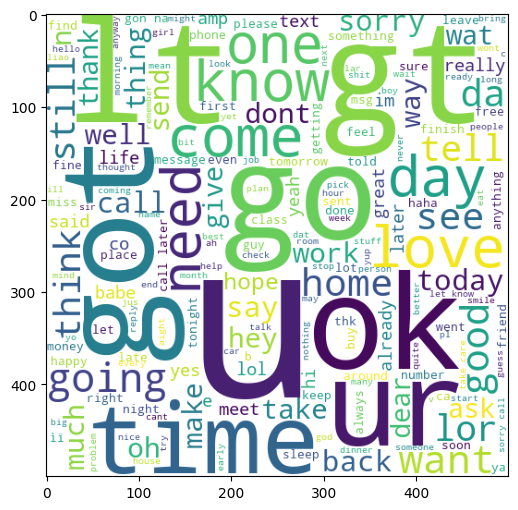

In [26]:
wc_spam=wc.generate(df[df["TARGET"]==0]["Text_Cleaned"].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(wc_spam)
plt.show()

In [27]:
# apply tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf=TfidfVectorizer()


In [29]:
x=tfidf.fit_transform(df["Text_Cleaned"])

In [30]:
x.shape

(5572, 6630)

In [31]:
y=df["TARGET"]

In [32]:
y.shape

(5572,)

In [33]:
# split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("shape of x_train",x_train.shape)
print("shape  of y_train",y_train.shape)
print("shape of y_test",y_test.shape)
print("shape of x_test",x_test.shape)

shape of x_train (4457, 6630)
shape  of y_train (4457,)
shape of y_test (1115,)
shape of x_test (1115, 6630)


In [42]:
# trained model

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , precision_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

mnb = MultinomialNB()  # Reduced alpha to improve generalization

lr = LogisticRegression(penalty="l2",solver='lbfgs')  

svm = SVC(kernel='sigmoid',  gamma=1.0)

rm = RandomForestClassifier(n_estimators=50,random_state=2)  

gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)  

adbc = AdaBoostClassifier( n_estimators=50, random_state=2)  

dt = DecisionTreeClassifier(max_depth=5)  

etc = ExtraTreeClassifier(random_state=2)  

# Store classifiers
clf_dict = {
    "MultinomialNB": mnb,
    "SVM": svm,
    "RandomForest": rm,
    "LogisticRegression": lr,
    "GradientBoosting": gbc,
    "AdaBoost": adbc,
    "DecisionTree": dt,
    "ExtraTree": etc
}


In [43]:
# Function to evaluate models
def classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision , matrix

In [46]:
# Train and evaluate all models
for name, model in clf_dict.items():
    acc, prec,cnf = classifier(model, x_train, y_train, x_test, y_test)
    print(f"{name}: Accuracy = {acc:.2f}, Precision = {prec:.2f}")
    print("confusion_metrix",cnf)
    

MultinomialNB: Accuracy = 0.96, Precision = 1.00
confusion_metrix [[965   0]
 [ 44 106]]
SVM: Accuracy = 0.97, Precision = 0.95
confusion_metrix [[959   6]
 [ 27 123]]
RandomForest: Accuracy = 0.97, Precision = 1.00
confusion_metrix [[965   0]
 [ 29 121]]
LogisticRegression: Accuracy = 0.94, Precision = 0.94
confusion_metrix [[959   6]
 [ 57  93]]
GradientBoosting: Accuracy = 0.95, Precision = 0.99
confusion_metrix [[964   1]
 [ 51  99]]
AdaBoost: Accuracy = 0.93, Precision = 0.89
confusion_metrix [[954  11]
 [ 64  86]]
DecisionTree: Accuracy = 0.94, Precision = 0.83
confusion_metrix [[944  21]
 [ 45 105]]
ExtraTree: Accuracy = 0.95, Precision = 0.88
confusion_metrix [[950  15]
 [ 44 106]]


In [47]:
import pickle 
pickle.dump(rm,open("model_1.pkl","wb"))

In [52]:
from sklearn.metrics import classification_report
rm_loaded = pickle.load(open("model_1.pkl", "rb"))
rm.fit(x_train,y_train)
y_pred=rm.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print("classifiacation report",classification_report(y_test,y_pred))
print("confusion_matrix",confusion_matrix(y_test,y_pred))

0.9739910313901345
1.0
classifiacation report               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

confusion_matrix [[965   0]
 [ 29 121]]
